In [2]:
library(tidyverse)
library(splatter)
library(scater)

In [3]:
set.seed(1)

In [4]:
# Estimate parameters from mock data
sce <- mockSCE()
params <- splatEstimate(sce)

NOTE: Library sizes have been found to be normally distributed instead of log-normal. You may want to check this is correct.



In [6]:
# Set number of genes
getParams(params, "nGenes") # 2000 genes
params <- setParam(params, "nGenes", 8000)

$nGenes
[1] 2000

In [11]:
getParams(params, "nCells")

$nCells
[1] 200

In [7]:
# Load SCE from 10X PBMC data (1000 cells)
sce_pbmc <- readRDS("ground_truth_1000_sce.rds")

In [13]:
#sce_pbmc
params_pmbc <- splatEstimate(sce_pbmc)

In [16]:
params_pmbc2 <- setParam(params_pmbc, "nGenes", 10000)


In [21]:
# Set number of cells to 8000
params_pmbc2 <- setParam(params_pmbc, "batchCells", 8000)


# Ways to do this
Could do one big experiment and separate

14 patients (groups?). 70 folders (batches?). 300,000 cells, ?number genes?, 
or just 8000 cells, 70 channels, i.e. for loop 70 

In [23]:
sim <- splatSimulate(params_pmbc2, nGenes = 20000)

Getting parameters...

Creating simulation object...

Simulating library sizes...

Simulating gene means...

Simulating BCV...

Simulating counts...

Simulating dropout (if needed)...

Done!



In [32]:
rownames(sce_pbmc)[]

[1] "ENSG00000004059" "ENSG00000003056" "ENSG00000173153" "ENSG00000004478"
[5] "ENSG00000003137" "ENSG00000003509"

In [41]:
counts(sim)[1:20,1:20]
counts(sim) %>% rowsum

,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,Cell10,Cell11,Cell12,Cell13,Cell14,Cell15,Cell16,Cell17,Cell18,Cell19,Cell20
Gene1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gene2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gene3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0
Gene4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gene5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gene6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gene7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0
Gene8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gene9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gene10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


ERROR: Error in rowsum.default(.): argument "group" is missing, with no default


In [37]:

write.table(rownames(sim), file= "out_dir/quants_mat_rows.txt", quote=FALSE, col.names=FALSE, row.names=FALSE)
write.table(colnames(sim), file= "out_dir/quants_mat_cols.txt", quote=FALSE, col.names=FALSE, row.names=FALSE)
write.table(counts(sim), file= "out_dir/quants_mat.csv", quote=FALSE, col.names=FALSE, row.names=FALSE, sep=",")  

In [44]:
i =2
paste0(c("out_dir/", "channel_", i, "/quants_mat_rows.txt"), collapse ="" )

[1] "out_dir/channel_2/quants_mat_rows.txt"

In [38]:
sim2 <- splatSimulate(params_pmbc2, nGenes = 20000)

Getting parameters...

Creating simulation object...

Simulating library sizes...

Simulating gene means...

Simulating BCV...

Simulating counts...

Simulating dropout (if needed)...

Done!



In [47]:
params_pmbc2@seed
dir.create(path = "out_dir/hey1")

[1] 642223

Warning message in dir.create(path = "out_dir/hey1"):
“cannot create dir 'out_dir/hey1', reason 'No such file or directory'”


In [50]:
barcodes <- read_delim("/ifs/research-groups/botnar/proj018/big_parellel_experiments/single_cell/simulated/data/737K-august-2016.txt", delim ="\t", col_names = FALSE  )

Parsed with column specification:
cols(
  X1 = col_character()
)



In [56]:
barcodes$X1 %>% length
barcodes$X1 %>% unique %>% length
barcodes$X1 %>% head

[1] 737280

[1] 737280

[1] "AAACCTGAGAAACCAT" "AAACCTGAGAAACCGC" "AAACCTGAGAAACCTA" "AAACCTGAGAAACGAG"
[5] "AAACCTGAGAAACGCC" "AAACCTGAGAAAGTGG"

In [60]:
ran <- readRDS("/ifs/research-groups/botnar/proj018/big_parellel_experiments/single_cell/simulated/test_old_bioconda/output_1000.dir/SCE.dir/PBMC_1000_cells/bus/inflection_sce.rds")

In [61]:
ran

class: SingleCellExperiment 
dim: 36292 1000 
metadata(0):
assays(2): counts logcounts
rownames(36292): ENSG00000275634 ENSG00000167861 ... ENSG00000251359
  ENSG00000267079
rowData names(0):
colnames(1000): TTTGTCATCCGCGGTA TTTGGTTAGCCCAGCT ... TGGCCAGGTATTAGCC
  GACGCGTGTGAGGGAG
colData names(0):
reducedDimNames(0):
altExpNames(0):

In [62]:
#params_pmbc2
#sim2
splatSimBatchCellMeans <- function(sim, params) {

    nBatches <- getParam(params, "nBatches")
    cell.names <- colData(sim)$Cell
    gene.names <- rowData(sim)$Gene
    gene.means <- rowData(sim)$GeneMean

    if (nBatches > 1) {
        batches <- colData(sim)$Batch
        batch.names <- unique(batches)

        batch.facs.gene <- rowData(sim)[, paste0("BatchFac", batch.names)]
        batch.facs.cell <- as.matrix(batch.facs.gene[,
                                                  as.numeric(factor(batches))])
    } else {
        nCells <- getParam(params, "nCells")
        nGenes <- getParam(params, "nGenes")

        batch.facs.cell <- matrix(1, ncol = nCells, nrow = nGenes)
    }

    batch.means.cell <- batch.facs.cell * gene.means

    colnames(batch.means.cell) <- cell.names
    rownames(batch.means.cell) <- gene.names
    assays(sim)$BatchCellMeans <- batch.means.cell

    return(sim)
}
splatSimBatchCellMeans(sim2,params_pmbc2) %>% head


In [83]:
sim = sim2
params = params_pmbc2
    nBatches <- getParam(params, "nBatches")
    cell.names <- colData(sim)$Cell
    gene.names <- rowData(sim)$Gene
    gene.means <- rowData(sim)$GeneMean

    if (nBatches > 1) {
        batches <- colData(sim)$Batch
        batch.names <- unique(batches)

        batch.facs.gene <- rowData(sim)[, paste0("BatchFac", batch.names)]
        batch.facs.cell <- as.matrix(batch.facs.gene[,
                                                  as.numeric(factor(batches))])
    } else {
        nCells <- getParam(params, "nCells")
        nGenes <- getParam(params, "nGenes")

        batch.facs.cell <- matrix(1, ncol = nCells, nrow = nGenes)
    }

In [74]:
getLNormFactors <- function(n.facs, sel.prob, neg.prob, fac.loc, fac.scale) {

    is.selected <- as.logical(rbinom(n.facs, 1, sel.prob))
    n.selected <- sum(is.selected)
    dir.selected <- (-1) ^ rbinom(n.selected, 1, neg.prob)
    facs.selected <- rlnorm(n.selected, fac.loc, fac.scale)
    # Reverse directions for factors that are less than one
    dir.selected[facs.selected < 1] <- -1 * dir.selected[facs.selected < 1]
    factors <- rep(1, n.facs)
    factors[is.selected] <- facs.selected ^ dir.selected

    return(factors)
}

In [81]:
params_pmbc2 <- setParam(params_pmbc2, "nGenes", 20000)

In [84]:
library(splatter)
rowData(sim) %>% head
    nGenes <- getParam(params, "nGenes")
    nBatches <- getParam(params, "nBatches")
    batch.facLoc <- getParam(params, "batch.facLoc")
    batch.facScale <- getParam(params, "batch.facScale")
    means.gene <- rowData(sim)$GeneMean

    for (idx in seq_len(nBatches)) {
        batch.facs <- getLNormFactors(nGenes, 1, 0.5, batch.facLoc[idx],
                                        batch.facScale[idx])
        print("here")
        batch.means.gene <- means.gene * batch.facs
        rowData(sim)[[paste0("BatchFacBatch", idx)]] <- batch.facs
    }
        batches <- colData(sim)$Batch
        batch.names <- unique(batches)

        batch.facs.gene <- rowData(sim)[, paste0("BatchFac", batch.names)]

DataFrame with 6 rows and 4 columns
             Gene BaseGeneMean OutlierFactor   GeneMean
      <character>    <numeric>     <numeric>  <numeric>
Gene1       Gene1   0.02787935             1 0.02787935
Gene2       Gene2   0.00820262             1 0.00820262
Gene3       Gene3   0.21389892             1 0.21389892
Gene4       Gene4   0.06701564             1 0.06701564
Gene5       Gene5   0.03261272             1 0.03261272
Gene6       Gene6   0.00029004             1 0.00029004

[1] "here"


In [116]:
##
x = 0.1
y = 0.1

batch.facs <- getLNormFactors(nGenes, 1, 0.5, x,
                                        y)
        batch.means.gene <- 11:20 * batch.facs[1:10]
print(c(x,y,"means", batch.means.gene[1:10]))
##
x = 0.2
y = 0.1

batch.facs <- getLNormFactors(nGenes, 1, 0.5, x,
                                        y)
        batch.means.gene <- 11:20 * batch.facs[1:10]
print(c(x,y,"means", batch.means.gene[1:10]))
##
x = 0.1
y = 0.2

batch.facs <- getLNormFactors(nGenes, 1, 0.5, x,
                                        y)
        batch.means.gene <- 11:20 * batch.facs[1:10]
print(c(x,y,"means", batch.means.gene[1:10]))
##
x = 0.2
y = 0.2

batch.facs <- getLNormFactors(nGenes, 1, 0.5, x,
                                        y)
        batch.means.gene <- 11:20 * batch.facs[1:10]
print(c(x,y,"means", batch.means.gene[1:10]))

 [1] "0.1"              "0.1"              "means"            "10.5375825639365"
 [5] "13.1112503953905" "13.9394412879643" "11.7135320341984" "18.3655617469401"
 [9] "14.473648001787"  "22.0124653307376" "16.0167627396913" "16.4584454024036"
[13] "18.9624890347568"
 [1] "0.2"              "0.1"              "means"            "14.8224764871894"
 [5] "13.8656477106087" "15.5710123518479" "12.6138296490662" "18.4786929393226"
 [9] "14.3852847068252" "17.629599931043"  "20.4170162670182" "16.3147980868632"
[13] "28.1673600926767"
 [1] "0.1"              "0.2"              "means"            "14.0541721974998"
 [5] "8.75256907383597" "18.4229465479049" "14.8310145442256" "16.215561610733" 
 [9] "16.7218096603013" "11.7813337754752" "13.4559624367631" "23.4496739501061"
[13] "18.3882308768811"
 [1] "0.2"              "0.2"              "means"            "8.12397137931845"
 [5] "11.5893395184687" "14.8014014439618" "19.7592198636077" "33.0901062692542"
 [9] "21.0738466808135" "16.603735074

In [110]:
1:10

[1]  1  2  3  4  5  6  7  8  9 10

In [96]:
sim2
params_pmbc

class: SingleCellExperiment 
dim: 20000 8000 
metadata(1): Params
assays(6): BatchCellMeans BaseCellMeans ... TrueCounts counts
rownames(20000): Gene1 Gene2 ... Gene19999 Gene20000
rowData names(4): Gene BaseGeneMean OutlierFactor GeneMean
colnames(8000): Cell1 Cell2 ... Cell7999 Cell8000
colData names(3): Cell Batch ExpLibSize
reducedDimNames(0):
altExpNames(0):

A Params object of class SplatParams 
Parameters can be (estimable) or [not estimable], 'Default' or  'NOT DEFAULT' 
Secondary parameters are usually set during simulation

Global: 
(GENES)  (CELLS)   [Seed] 
  54958     1000   642223 

28 additional parameters 

Batches: 
    [BATCHES]  [BATCH CELLS]     [Location]        [Scale] 
            1           1000            0.1            0.1 

Mean: 
           (RATE)            (SHAPE) 
 5.58235929125999  0.474640085808885 

Library size: 
       (LOCATION)            (SCALE)             (Norm) 
 8.86907665034351  0.320610229046677              FALSE 

Exprs outliers: 
     (PROBABILITY)          (LOCATION)             (SCALE) 
0.0136782022934129    5.64205709073572    1.01132767774803 

Groups: 
     [Groups]  [Group Probs] 
            1              1 

Diff expr: 
[Probability]    [Down Prob]     [Location]        [Scale] 
          0.1            0.5            0.1            0.4 

BCV: 
    (COMMON DISP)              (DOF) 
0.2556

#### TEST Batches

In [170]:
params <- newSplatParams(batchCells = c(50, 50,50))
params
sim.batches <- splatSimulate(params, batchCells = c(50, 50,50), verbose = FALSE)

    nGenes <- getParam(params, "nGenes")
    nBatches <- getParam(params, "nBatches")
    batch.facLoc <- getParam(params, "batch.facLoc")
    batch.facScale <- getParam(params, "batch.facScale")
    means.gene <- rowData(sim)$GeneMean

    for (idx in seq_len(nBatches)) {
        batch.facs <- getLNormFactors(nGenes, 1, 0.5, batch.facLoc[idx],
                                        batch.facScale[idx])
        print("here")
        batch.means.gene <- means.gene * batch.facs
        rowData(sim)[[paste0("BatchFacBatch", idx)]] <- batch.facs
    }
        batches <- colData(sim)$Batch
        batch.names <- unique(batches)

        batch.facs.gene <- rowData(sim)[, paste0("BatchFac", batch.names)]

A Params object of class SplatParams 
Parameters can be (estimable) or [not estimable], 'Default' or  'NOT DEFAULT' 
Secondary parameters are usually set during simulation

Global: 
(Genes)  (CELLS)   [Seed] 
  10000      150   642223 

28 additional parameters 

Batches: 
    [BATCHES]  [BATCH CELLS]     [Location]        [Scale] 
            3     50, 50, 50            0.1            0.1 

Mean: 
 (Rate)  (Shape) 
    0.3      0.6 

Library size: 
(Location)     (Scale)      (Norm) 
        11         0.2       FALSE 

Exprs outliers: 
(Probability)     (Location)        (Scale) 
         0.05              4            0.5 

Groups: 
     [Groups]  [Group Probs] 
            1              1 

Diff expr: 
[Probability]    [Down Prob]     [Location]        [Scale] 
          0.1            0.5            0.1            0.4 

BCV: 
(Common Disp)          (DoF) 
          0.1             60 

Dropout: 
    [Type]  (Midpoint)     (Shape) 
      none           0          -1 

Paths: 
    

[1] "here"


Warning message in rlnorm(n.selected, fac.loc, fac.scale):
“NAs produced”


ERROR: Error in dir.selected[facs.selected < 1] <- -1 * dir.selected[facs.selected < : NAs are not allowed in subscripted assignments


In [177]:
    cell.names <- paste0("Cell", seq_len(30))
    gene.names <- paste0("Gene", seq_len(40))
    batch.names <- paste0("Batch", seq_len(3))

batch.cells <- c(10,10,10)
    batches <- lapply(seq_len(nBatches), function(i, b) {rep(i, b[i])},
                      b = batch.cells)
    batches <- unlist(batches)
    #colData(sim)$Batch <- batch.names[batches]
batches
batch.names[batches]

[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3

[1] "Batch1" "Batch1" "Batch1" "Batch1" "Batch1" "Batch1" "Batch1" "Batch1"
 [9] "Batch1" "Batch1" "Batch2" "Batch2" "Batch2" "Batch2" "Batch2" "Batch2"
[17] "Batch2" "Batch2" "Batch2" "Batch2" "Batch3" "Batch3" "Batch3" "Batch3"
[25] "Batch3" "Batch3" "Batch3" "Batch3" "Batch3" "Batch3"

In [123]:
(sim.batches@colData)[100:102,]

DataFrame with 3 rows and 3 columns
               Cell       Batch ExpLibSize
        <character> <character>  <numeric>
Cell100     Cell100      Batch2    68999.1
Cell101     Cell101      Batch3    56560.7
Cell102     Cell102      Batch3   109065.1

In [ ]:
splatSimulate(params = params_pmbc2, method = "groups", batchCells = c(150000,150000,150000,150000,150000,
                                                                      150000,150000,150000,150000,150000),
                 group.prob = c(0.2,0.2,0.2,0.2,0.2), verbose = FALSE, nGenes = 8000)

In [125]:
sim_test <- splatSimulate(params = params_pmbc2, method = "groups", batchCells = c(150,150,150,150,150,
                                                                      1500,150,150,150,150),
                 group.prob = c(0.2,0.2,0.2,0.2,0.2), verbose = FALSE, nGenes = 8000)

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 10. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 1950 rows containing missing values (geom_point).”


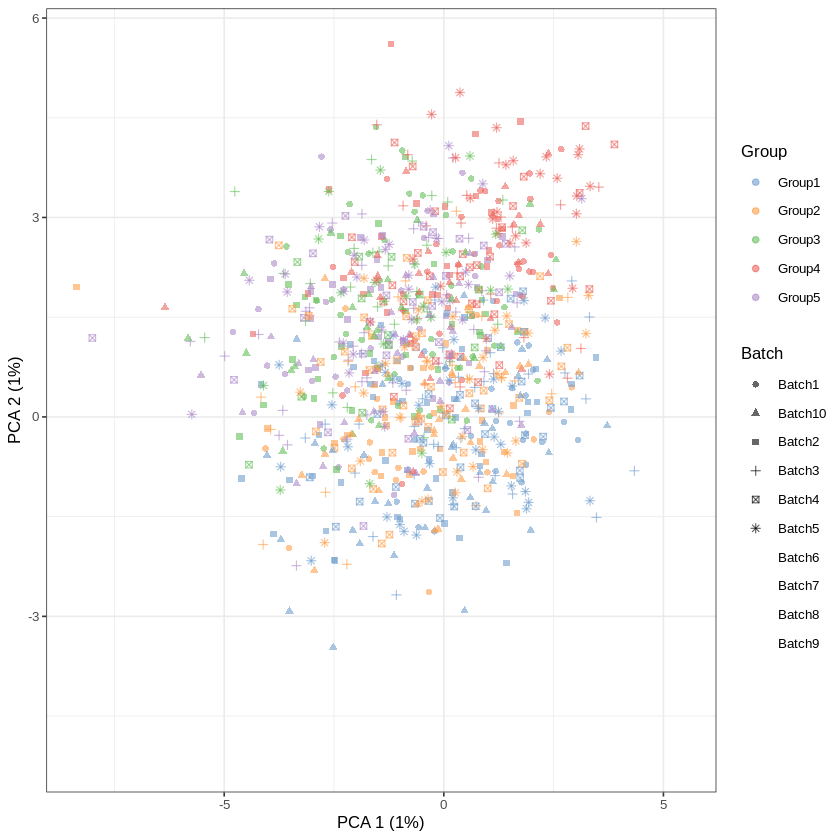

In [126]:
sim_test <- logNormCounts(sim_test)
sim_test <- runPCA(sim_test)
plotPCA(sim_test, shape_by = "Batch", colour_by = "Group")

In [169]:
splatSimBatchEffects <- function(sim, params) {

    nGenes <- getParam(params, "nGenes")
    nBatches <- getParam(params, "nBatches")
    batch.facLoc <- getParam(params, "batch.facLoc")
    batch.facScale <- getParam(params, "batch.facScale")
    means.gene <- rowData(sim)$GeneMean

    for (idx in seq_len(nBatches)) {
        batch.facs <- getLNormFactors(nGenes, 1, 0.5, batch.facLoc[idx],
                                        batch.facScale[idx])
        batch.means.gene <- means.gene * batch.facs
        rowData(sim)[[paste0("BatchFacBatch", idx)]] <- batch.facs
    }

    return(sim)
}

In [168]:
batch.facLoc <- getParam(params, "batch.facLoc")
batch.facScale <- getParam(params, "batch.facScale")
batch.facLoc
nBatches <- getParam(params, "nBatches")
nGenes <- getParam(params, "nGenes")

for (idx in seq_len(nBatches)) {
    print(idx)
        batch.facs <- getLNormFactors(nGenes, 1, 0.5, batch.facLoc[idx],
                                        batch.facScale[idx])}

[1] 0.1

[1] 1
[1] 2


Warning message in rlnorm(n.selected, fac.loc, fac.scale):
“NAs produced”


ERROR: Error in dir.selected[facs.selected < 1] <- -1 * dir.selected[facs.selected < : NAs are not allowed in subscripted assignments


In [190]:
    params <- expandParams(params)

ERROR: Error in expandParams(params): could not find function "expandParams"


In [191]:
.libPaths()

[1] "/ifs/devel/annajb/conda-install/envs/minnow_env/lib/R/library"

In [198]:
evan_smells <- function()
    print("evan smells of shit!!!")
    params = newKersplatParams()
    params %>% head

environment(evan_smells) <- asNamespace('splatter')
assignInNamespace("kersplatEstimate", evan_smells, ns = "splatter")

splatSimulate_multi_batches

ERROR: Error in newKersplatParams(): The Kersplat simulation requires the 'igraph' package.


In [202]:
environment(splatSimulate_multi_batches) <- asNamespace('splatter')
assignInNamespace("splatSimulate", splatSimulate_multi_batches, ns = "splatter")

In [207]:
splatSimulate_multi_batches(params = newSplatParams(),
                          method = c("single", "groups", "paths"),
                          verbose = TRUE, nChannels = 70,  nPatients = 14,  batchCells = c(150,150,150,150,150,
                                                                      1500,150,150,150,150),
                 group.prob = c(0.2,0.2,0.2,0.2,0.2))

ERROR: Error in bringItemsForward(update, c("batchCells", "group.prob")): could not find function "bringItemsForward"


In [197]:
splatter::kersplatEstimate()

[1] "evan smells of shit!!!"


In [188]:


source("splatSimulate_anna.R")

ERROR: Error in setMethod("expandParams", "SplatParams", function(object) {: no existing definition for function ‘expandParams’


In [180]:
sim_test_anna <- splatSimulate_multi_batches(params = params_pmbc2, method = "groups", batchCells = c(140,140,140,140,140,
                                                                      140,140,140,140,140),
                 group.prob = c(0.2,0.2,0.2,0.2,0.2), verbose = FALSE, nGenes = 2000, nChannels = 70, nPatients = 14)

ERROR: Error in expandParams(params): could not find function "expandParams"
